In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math
from datetime import datetime, timedelta
#from datetime import timedelta  ## use this to increment targ by 1 year!!!!
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
#import random

import sys
import os
os.chdir('C:/BankRisk')

In [2]:
grp = 'grpTotUSx00'
#grp = 'grpTotUSx18'
#grp = 'grpC18x00'

In [3]:
## select time period: 2001-2014, 2001-2007, 2008-2014 (14y, 7y, 7y)
#r0 = '2001_2007'
r0 = '2001_2010'
#r0 = '2001_2014'

ra = int(r0[0:4])
rb = int(r0[-4:])
r0, ra, rb

('2001_2010', 2001, 2010)

In [4]:
dn = pd.read_csv('NIMdata_FDIC_'+grp+'_exp.csv',index_col=0,parse_dates=True)
#'NIMdata_FDIC_grpTotUSx00_exp.csv'
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  495237642.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  502532527.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI  ...  \
AsOf                                                          ...   
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799  ...   
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959  ...   

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  431305387.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  423510460.0  

[2 rows x 77 columns]

In [5]:
len(dn.columns)

77

In [6]:
dn.columns

Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
       'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
       'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
       'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
       'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
       'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
       'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
       'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
       'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
       'aFDepIB', 'aFFP', 'aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr',
       'aSavNow', 'aCD', 'rNIM', 'aLnLsPc', 'aAstPc', 'aLiabPc', 'netDDA'],
      dtype='object')

In [7]:
#dm = pd.read_csv('yldreg_3mat_bestdur_FDIC_'+grp+'_'+r0+'_10y.csv',index_col=0)
dm = pd.read_csv('yldreg_3mataltbest_FDIC_'+grp+'_'+r0+'_exp4.csv',index_col=0)
dm.head()

grp      prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0  grpTotUSx00       DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
2  grpTotUSx00     Prime  r0   r1   r6  0.75  0.20  0.020833  3.012379   
4  grpTotUSx00      qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
6  grpTotUSx00  qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
8  grpTotUSx00   qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   

         sd  lng  lng2 bst     dur_1      sd_1       slp    prod_1      slpn  
0  0.761571  r48    48   x  1.271627  1.018613 -0.668616       DDA -1.043422  
2  0.052124   r6     6   x  0.018750  0.053576 -0.696962     Prime -0.696962  
4  0.194878  r48    48   x  1.033209  0.221749 -0.951013      qrCD -1.944287  
6  0.209809  r48    48   x  0.521038  0.249425 -0.586899  qrFDepIB -1.159982  
8  0.214556  r36    36   x  0.306069  0.272176 -0.871712   qrOLbIB -1.339397

In [8]:
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
2   grpTotUSx00      Prime  r0   r1   r6  0.75  0.20  0.020833  3.012379   
4   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
6   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
8   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
11  grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
13  grpTotUSx00       qyCI  r0   r1  r60  0.60  0.00  0.950435  2.934822   
15  grpTotUSx00     qyCsmr  r0  r36  r48  0.25  0.10  1.410492  5.240680   
17  grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
19  grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
21  grpTotUSx00       qyRE  r0   r1  r48  0.40  0.00  1.164576  2.440559   
22  grpTotUSx00   qyTotSec  r0   r6  r48  0.00  0.30  1.433672  0.431913   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
2   0.052124   r6     6   x  0.018750  0.053576 -0.696962      Prime -0.696962  
4   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
6   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
8   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
11  0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
13  0.367545  r60    60   x  0.776384  0.418404 -0.292210       qyCI -0.881045  
15  0.617770  r48    48   x  1.190943  0.688353 -0.321489     qyCsmr -1.038801  
17  0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
19  0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
21  0.328549  r48    48   x  0.893207  0.433659 -0.387334       qyRE -1.436375  
22  0.305873  r48    48   x  1.190943  0.419593 -0.468506   qyTotSec -1.410855

In [9]:
ls = pd.read_csv('LibSwap_LongHist_30y_201812.csv',index_col=0,parse_dates=True)
ls.head(2)

F1d       L1m       L3m       L6m  L12m       S1y       S2y  \
Date                                                                       
1965-01-01  3.90  4.236603  4.573205  4.713205   NaN  4.713205  4.773205   
1965-02-01  3.98  4.336603  4.693205  4.773205   NaN  4.823205  4.838205   

                 S3y       S4y       S5y       S7y      S10y      S30y  Prime  \
Date                                                                            
1965-01-01  4.793205  4.828205  4.863205  4.839718  4.966538  4.927428    4.5   
1965-02-01  4.843205  4.878205  4.913205  4.865718  4.986538  4.947241    4.5   

            L9m  
Date             
1965-01-01  NaN  
1965-02-01  NaN

In [10]:
ls.tail(2)

F1d       L1m       L3m       L6m      L12m       S1y       S2y  \
Date                                                                           
2019-02-01  2.40  2.494466  2.676678  2.735358  2.914852  2.691231  2.629789   
2019-03-01  2.41  2.489805  2.605675  2.674842  2.815985  2.627749  2.523619   

                 S3y       S4y       S5y       S7y      S10y      S30y  Prime  \
Date                                                                            
2019-02-01  2.577789  2.559684  2.565632  2.608842  2.695105  2.834947    5.5   
2019-03-01  2.456095  2.438750  2.434714  2.481381  2.578000  2.758667    5.5   

            L9m  
Date             
2019-02-01  NaN  
2019-03-01  NaN

In [11]:
# calc rolling means, then resample('Q')
#df3a['x'] = df3z.groupby(['Grp','IDRSSD'])['qCashExp'].apply(pd.rolling_sum, 4, min_periods=4) 
ls['r0'] = ls['F1d'] * 365/360
ls['r1'] = ls['L1m'] * 365/360
ls['r3'] = ls['L3m'].rolling(3, min_periods=3).mean() * 365/360
ls['r6'] = ls['L6m'].rolling(6, min_periods=6).mean() * 365/360
ls['r12'] = ls['S1y'].rolling(12, min_periods=12).mean()
ls['r24'] = ls['S2y'].rolling(24, min_periods=24).mean()
ls['r36'] = ls['S3y'].rolling(36, min_periods=36).mean()
ls['r48'] = ls['S4y'].rolling(48, min_periods=48).mean()
ls['r60'] = ls['S5y'].rolling(60, min_periods=60).mean()
ls['r84'] = ls['S7y'].rolling(84, min_periods=84).mean()
ls['r120'] = ls['S10y'].rolling(120, min_periods=120).mean()
ls['r360'] = ls['S30y'].rolling(360, min_periods=360).mean()
ls.tail(3)

F1d       L1m       L3m       L6m      L12m       S1y       S2y  \
Date                                                                           
2019-01-01  2.40  2.509791  2.774178  2.848119  3.017335  2.763750  2.699381   
2019-02-01  2.40  2.494466  2.676678  2.735358  2.914852  2.691231  2.629789   
2019-03-01  2.41  2.489805  2.605675  2.674842  2.815985  2.627749  2.523619   

                 S3y       S4y       S5y  ...        r3        r6       r12  \
Date                                      ...                                 
2019-01-01  2.640619  2.619048  2.618905  ...  2.774569  2.767712  2.635018   
2019-02-01  2.577789  2.559684  2.565632  ...  2.783861  2.804162  2.675559   
2019-03-01  2.456095  2.438750  2.434714  ...  2.722809  2.822039  2.696935   

                 r24       r36       r48       r60       r84      r120  \
Date                                                                     
2019-01-01  2.251884  1.949822  1.875901  1.922763  2.005261  2.572571   
2019-02-01  2.297891  1.996150  1.899020  1.938524  2.017628  2.569197   
2019-03-01  2.334360  2.034374  1.918785  1.950436  2.026454  2.565097   

                r360  
Date                  
2019-01-01  5.496184  
2019-02-01  5.476781  
2019-03-01  5.457194  

[3 rows x 27 columns]

In [12]:
lsq = ls.resample('Q').mean()
lsq.tail(3)

F1d       L1m       L3m       L6m      L12m       S1y  \
Date                                                                     
2018-09-30  1.923333  2.109522  2.337373  2.536076  2.831883  2.678095   
2018-12-31  2.220000  2.351438  2.632044  2.813990  3.067228  2.869381   
2019-03-31  2.403333  2.498021  2.685510  2.752773  2.916057  2.694244   

                 S2y       S3y       S4y       S5y  ...        r3        r6  \
Date                                                ...                       
2018-09-30  2.868124  2.923338  2.939792  2.945717  ...  2.366875  2.501744   
2018-12-31  2.980885  2.998788  3.002126  3.005079  ...  2.533483  2.647178   
2019-03-31  2.617596  2.558168  2.539161  2.539750  ...  2.760413  2.797971   

                 r12       r24       r36       r48       r60       r84  \
Date                                                                     
2018-09-30  2.184707  1.904300  1.706647  1.726011  1.813941  1.933648   
2018-12-31  2.484374  2.136647  1.864204  1.820730  1.886135  1.978817   
2019-03-31  2.669171  2.294712  1.993449  1.897902  1.937241  2.016448   

                r120      r360  
Date                            
2018-09-30  2.596897  5.587019  
2018-12-31  2.572791  5.532837  
2019-03-31  2.568955  5.476720  

[3 rows x 27 columns]

In [13]:
lsq2 = lsq['2001':'2018']  # UPDATED TO 2018 from 2014
lsq2.tail(2)

F1d       L1m       L3m       L6m      L12m       S1y  \
Date                                                                     
2018-09-30  1.923333  2.109522  2.337373  2.536076  2.831883  2.678095   
2018-12-31  2.220000  2.351438  2.632044  2.813990  3.067228  2.869381   

                 S2y       S3y       S4y       S5y  ...        r3        r6  \
Date                                                ...                       
2018-09-30  2.868124  2.923338  2.939792  2.945717  ...  2.366875  2.501744   
2018-12-31  2.980885  2.998788  3.002126  3.005079  ...  2.533483  2.647178   

                 r12       r24       r36       r48       r60       r84  \
Date                                                                     
2018-09-30  2.184707  1.904300  1.706647  1.726011  1.813941  1.933648   
2018-12-31  2.484374  2.136647  1.864204  1.820730  1.886135  1.978817   

                r120      r360  
Date                            
2018-09-30  2.596897  5.587019  
2018-12-31  2.572791  5.532837  

[2 rows x 27 columns]

In [14]:
len(lsq2)

72

In [15]:
lsq.to_csv('LS_ladders.csv')

In [16]:
lsq[['F1d','r0']].tail()

F1d        r0
Date                          
2018-03-31  1.446667  1.466759
2018-06-30  1.736667  1.760787
2018-09-30  1.923333  1.950046
2018-12-31  2.220000  2.250833
2019-03-31  2.403333  2.436713

In [17]:
dm.reset_index(drop=True, inplace=True)
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
1   grpTotUSx00      Prime  r0   r1   r6  0.75  0.20  0.020833  3.012379   
2   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
3   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
4   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
5   grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
6   grpTotUSx00       qyCI  r0   r1  r60  0.60  0.00  0.950435  2.934822   
7   grpTotUSx00     qyCsmr  r0  r36  r48  0.25  0.10  1.410492  5.240680   
8   grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
9   grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
10  grpTotUSx00       qyRE  r0   r1  r48  0.40  0.00  1.164576  2.440559   
11  grpTotUSx00   qyTotSec  r0   r6  r48  0.00  0.30  1.433672  0.431913   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
1   0.052124   r6     6   x  0.018750  0.053576 -0.696962      Prime -0.696962  
2   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
3   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
4   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
5   0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
6   0.367545  r60    60   x  0.776384  0.418404 -0.292210       qyCI -0.881045  
7   0.617770  r48    48   x  1.190943  0.688353 -0.321489     qyCsmr -1.038801  
8   0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
9   0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
10  0.328549  r48    48   x  0.893207  0.433659 -0.387334       qyRE -1.436375  
11  0.305873  r48    48   x  1.190943  0.419593 -0.468506   qyTotSec -1.410855

In [18]:
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  495237642.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  502532527.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI  ...  \
AsOf                                                          ...   
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799  ...   
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959  ...   

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  431305387.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  423510460.0  

[2 rows x 77 columns]

In [19]:
# NIM calcs: dn(balyld), dm(durmatsmixes), dl(ladders)

In [20]:
dl = lsq2.copy()

In [21]:
dn.head(2)

Grp   nbr       eTotAst      eTangEq         eDDA  \
AsOf                                                                    
2001-03-31  grpTotUSx00  8857  6.619299e+09  495237642.0  735630015.0   
2001-06-30  grpTotUSx00  8790  6.670875e+09  502532527.0  767738647.0   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI  ...  \
AsOf                                                          ...   
2001-03-31  3.692046  7.841322  8.825734  8.458727  8.714799  ...   
2001-06-30  3.727612  7.347639  8.293801  7.955809  8.165959  ...   

                  aOLbIB    aFF_TA        aCsmr       aSavNow           aCD  \
AsOf                                                                          
2001-03-31  1.123344e+09 -1.149463  565178660.0  1.658162e+09  1.480339e+09   
2001-06-30  1.143565e+09 -1.166986  572302418.0  1.731745e+09  1.474806e+09   

            rNIM       aLnLsPc        aAstPc       aLiabPc       netDDA  
AsOf                                                                     
2001-03-31   NaN  4.017461e+09  5.863822e+09  5.672909e+09  431305387.0  
2001-06-30   NaN  4.052875e+09  5.935800e+09  5.777495e+09  423510460.0  

[2 rows x 77 columns]

In [22]:
# calc FTP rates for each time period:
for i in np.arange(len(dm)):
  mt1=dm.ix[i]['mt1']
  mt2=dm.ix[i]['mt2']
  mt3=dm.ix[i]['mt3']
  mx1=dm.ix[i]['mx1']
  mx2=dm.ix[i]['mx2']
  mx3=1-mx1-mx2
  pr = 'f'+dm.ix[i]['prod']
  dn[pr] = dl[mt1]*mx1 + dl[mt2]*mx2 + dl[mt3]*mx3

dn['DDA'] = 0
dn['Prime'] = dl['Prime']

In [23]:
for i in np.arange(len(dm)):
  pr = dm.ix[i]['prod']
  fpr = 'f'+ pr
  spr = 's' + pr
  mlt = 1
  if 'qr' in pr: mlt = -1
  if pr == 'DDA': mlt = -1
  dn[spr] = (dn[pr] - dn[fpr]) * mlt

In [24]:
dm

grp       prod mt1  mt2  mt3   mx1   mx2       dur       spd  \
0   grpTotUSx00        DDA  r0   r1  r48  0.00  0.15  1.656066 -4.256987   
1   grpTotUSx00      Prime  r0   r1   r6  0.75  0.20  0.020833  3.012379   
2   grpTotUSx00       qrCD  r0  r12  r48  0.20  0.35  1.061465 -0.285886   
3   grpTotUSx00   qrFDepIB  r0   r1  r48  0.55  0.15  0.588538 -0.661015   
4   grpTotUSx00    qrOLbIB  r0   r1  r36  0.75  0.00  0.372170  0.879713   
5   grpTotUSx00   qrSavNow  r0   r1  r48  0.15  0.25  1.174993 -2.520595   
6   grpTotUSx00       qyCI  r0   r1  r60  0.60  0.00  0.950435  2.934822   
7   grpTotUSx00     qyCsmr  r0  r36  r48  0.25  0.10  1.410492  5.240680   
8   grpTotUSx00   qyOAstIB  r0   r1  r48  0.25  0.40  0.696003 -0.451823   
9   grpTotUSx00  qyOthLnLs  r0   r6  r48  0.35  0.10  1.092528  2.042832   
10  grpTotUSx00       qyRE  r0   r1  r48  0.40  0.00  1.164576  2.440559   
11  grpTotUSx00   qyTotSec  r0   r6  r48  0.00  0.30  1.433672  0.431913   

          sd  lng  lng2 bst     dur_1      sd_1       slp     prod_1      slpn  
0   0.761571  r48    48   x  1.271627  1.018613 -0.668616        DDA -1.043422  
1   0.052124   r6     6   x  0.018750  0.053576 -0.696962      Prime -0.696962  
2   0.194878  r48    48   x  1.033209  0.221749 -0.951013       qrCD -1.944287  
3   0.209809  r48    48   x  0.521038  0.249425 -0.586899   qrFDepIB -1.159982  
4   0.214556  r36    36   x  0.306069  0.272176 -0.871712    qrOLbIB -1.339397  
5   0.365478  r48    48   x  0.895291  0.528753 -0.583745   qrSavNow -1.157662  
6   0.367545  r60    60   x  0.776384  0.418404 -0.292210       qyCI -0.881045  
7   0.617770  r48    48   x  1.190943  0.688353 -0.321489     qyCsmr -1.038801  
8   0.230264  r48    48   x  0.605888  0.295218 -0.720795   qyOAstIB -1.260312  
9   0.343466  r48    48   x  1.089284  0.346928 -1.067387  qyOthLnLs -1.443629  
10  0.328549  r48    48   x  0.893207  0.433659 -0.387334       qyRE -1.436375  
11  0.305873  r48    48   x  1.190943  0.419593 -0.468506   qyTotSec -1.410855

In [25]:
alst = [x for x in dm['prod'] if 'qy' in x]
llst = [x for x in dm['prod'] if 'qr' in x] 
alst, llst

(['qyCI', 'qyCsmr', 'qyOAstIB', 'qyOthLnLs', 'qyRE', 'qyTotSec'],
 ['qrCD', 'qrFDepIB', 'qrOLbIB', 'qrSavNow'])

In [26]:
#
balst = ['aTotRE','aCI','aCsmr','aOthLnLs','aTotSec','aOAstIB','netDDA','aSavNow','aCD','aFDepIB','aOLbIB']
splst = ['sqyRE','sqyCI','sqyCsmr','sqyOthLnLs','sqyTotSec','sqyOAstIB','sDDA','sqrSavNow','sqrCD','sqrFDepIB','sqrOLbIB']
#ablst = ['a' + x[2:] for x in alst]
#ablst = ['aTotRE' if x=='aRE' else x for x in ablst]
#lblst = ['a' + x[2:] for x in llst] + ['netDDA']
balst, splst

(['aTotRE',
  'aCI',
  'aCsmr',
  'aOthLnLs',
  'aTotSec',
  'aOAstIB',
  'netDDA',
  'aSavNow',
  'aCD',
  'aFDepIB',
  'aOLbIB'],
 ['sqyRE',
  'sqyCI',
  'sqyCsmr',
  'sqyOthLnLs',
  'sqyTotSec',
  'sqyOAstIB',
  'sDDA',
  'sqrSavNow',
  'sqrCD',
  'sqrFDepIB',
  'sqrOLbIB'])

In [27]:
sum(dn.ix[0][balst][0:6]),sum(dn.ix[0][balst][6:]), dn.ix[0]['eTangEq']

(5863821815.0, 5368584173.0, 495237642.0)

In [28]:
dn.ix[0]['aEarnAst']

5863821815.0

In [29]:
dn.ix[0][balst][6:]

netDDA     4.31305e+08
aSavNow    1.65816e+09
aCD        1.48034e+09
aFDepIB    6.75434e+08
aOLbIB     1.12334e+09
Name: 2001-03-31 00:00:00, dtype: object

In [30]:
sum(dn.ix[0][['netDDA','aSavNow','aCD','aFDepIB','aOLbIB','eTangEq']])

5863821815.0

In [31]:
dn.columns[:65],dn.columns[65:]

(Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
        'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
        'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
        'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
        'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
        'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
        'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
        'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
        'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
        'aFDepIB', 'aFFP'],
       dtype='object'),
 Index(['aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr', 'aSavNow', 'aCD',
        'rNIM', 'aLnLsPc', 'aAstPc', 'aLiabPc', 'netDDA', 'fDDA', 'fPrime',
        'fqrCD', 'fqrFDepIB', 'fqrOLbIB', 'fqrSavNow', 'fqyCI', 'fqyCsmr',
        'fqyOAstIB', 'fqyOthLnL

In [32]:
[x for x in dn.columns if 'TotII' in x]

['qyTotII']

In [33]:
balst

['aTotRE',
 'aCI',
 'aCsmr',
 'aOthLnLs',
 'aTotSec',
 'aOAstIB',
 'netDDA',
 'aSavNow',
 'aCD',
 'aFDepIB',
 'aOLbIB']

In [34]:
ba = balst # 0-5 ast, 6-10 liab (0-3 TotLnLs) (6-9 TotDep)
sp = splst # 0-5 ast, 6-10 liab

In [35]:
# spread NIM & mismatch NIM calcs:
dn['sNIM'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]]+\
                     x[ba[4]]*x[sp[4]]+x[ba[5]]*x[sp[5]]+x[ba[6]]*x[sp[6]]+x[ba[7]]*x[sp[7]]+\
                     x[ba[8]]*x[sp[8]]+x[ba[9]]*x[sp[9]]+x[ba[10]]*x[sp[10]])/x['aEarnAst'],axis=1)
dn['mNIM'] = dn.apply(lambda x: x['qyNIM'] - x['sNIM'],axis=1)

In [36]:
dn['sTotII'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]]+\
                     x[ba[4]]*x[sp[4]]+x[ba[5]]*x[sp[5]])/x['aEarnAst'],axis=1)
dn['fTotII'] = dn['qyTotII'] - dn['sTotII']
dn['sTotIE'] = dn.apply(lambda x: (x[ba[6]]*x[sp[6]]+x[ba[7]]*x[sp[7]]+x[ba[8]]*x[sp[8]]+x[ba[9]]*x[sp[9]]+\
                     x[ba[10]]*x[sp[10]])/x['aEarnAst'],axis=1)
dn['fTotIE'] = dn['qrTotIE'] + dn['sTotIE']

In [37]:
dn['sTotLnLs'] = dn.apply(lambda x: (x[ba[0]]*x[sp[0]]+x[ba[1]]*x[sp[1]]+x[ba[2]]*x[sp[2]]+x[ba[3]]*x[sp[3]])/\
                        x['aTotLnLs'],axis=1)
dn['fTotLnLs'] = dn.apply(lambda x: x['qyTotLnLs'] - x['sTotLnLs'],axis=1)
dn['aTotDep'] = dn['aDDepIB'] + dn['aFDepIB'] + dn['netDDA']
dn['sTotDep'] = dn.apply(lambda x: (x['sDDA']*x['netDDA']+x['sqrCD']*x['aCD']+x['sqrSavNow']*x['aSavNow']+\
                                   x['sqrFDepIB']*x['aFDepIB'])/x['aTotDep'],axis=1)
dn['fTotDep'] = dn.apply(lambda x: (x['fDDA']*x['netDDA']+x['fqrCD']*x['aCD']+x['fqrSavNow']*x['aSavNow']+\
                                   x['fqrFDepIB']*x['aFDepIB'])/x['aTotDep'],axis=1)
dn['qrTotDep'] = dn['fTotDep']-dn['sTotDep']

In [38]:
dnorig = dn.copy()
dn = dn.ix[:'2018'] ## UPDATED
dn.tail()

Grp   nbr       eTotAst       eTangEq          eDDA  \
AsOf                                                                      
2017-12-31  grpTotUSx00  5721  1.742612e+10  1.600593e+09  3.370844e+09   
2018-03-31  grpTotUSx00  5657  1.754226e+10  1.605249e+09  3.373601e+09   
2018-06-30  grpTotUSx00  5593  1.754470e+10  1.596659e+09  3.336310e+09   
2018-09-30  grpTotUSx00  5527  1.768523e+10  1.604706e+09  3.260010e+09   
2018-12-31  grpTotUSx00  5456  1.795456e+10  1.628368e+09  3.252490e+09   

             qyNetII   qyTotII   qyTotLn      qyRE      qyCI  ...    sTotII  \
AsOf                                                          ...             
2017-12-31  3.228502  3.755280  4.959602  4.172396  4.287259  ...  2.355118   
2018-03-31  3.281739  3.870580  5.066543  4.286007  4.410342  ...  2.317268   
2018-06-30  3.335928  4.027705  5.219746  4.391705  4.715121  ...  2.283233   
2018-09-30  3.381903  4.170592  5.386406  4.480037  4.849725  ...  2.288867   
2018-12-31  3.409694  4.304991  5.507439  4.553700  4.977375  ...  2.255795   

              fTotII    sTotIE    fTotIE  sTotLnLs  fTotLnLs       aTotDep  \
AsOf                                                                         
2017-12-31  1.400163  0.723252  1.250031  3.561365  1.377043  1.290826e+10   
2018-03-31  1.553311  0.810203  1.399043  3.529577  1.523685  1.298847e+10   
2018-06-30  1.744472  0.878471  1.570248  3.499932  1.703006  1.306564e+10   
2018-09-30  1.881726  0.901572  1.690261  3.533771  1.835787  1.319109e+10   
2018-12-31  2.049196  0.957233  1.852530  3.474758  2.014359  1.337163e+10   

             sTotDep   fTotDep  qrTotDep  
AsOf                                      
2017-12-31  0.966459  1.401175  0.434717  
2018-03-31  1.072579  1.560982  0.488403  
2018-06-30  1.162425  1.742409  0.579984  
2018-09-30  1.188841  1.870373  0.681532  
2018-12-31  1.253334  2.042446  0.789112  

[5 rows x 115 columns]

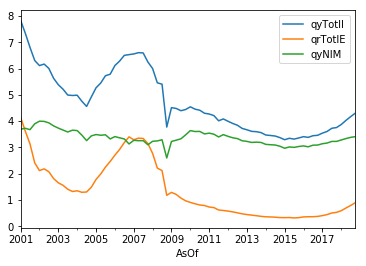

In [39]:
dn[['qyTotII','qrTotIE','qyNIM']].plot()

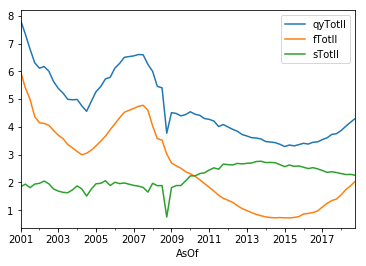

In [40]:
dn[['qyTotII','fTotII','sTotII']].plot()

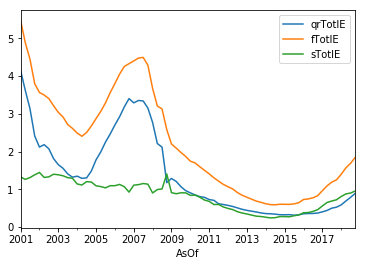

In [41]:
dn[['qrTotIE','fTotIE','sTotIE']].plot()

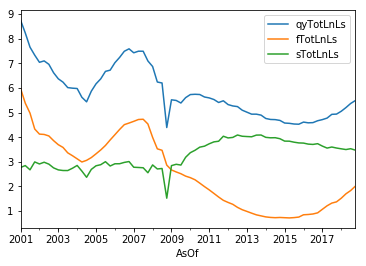

In [42]:
dn[['qyTotLnLs','fTotLnLs','sTotLnLs']].plot()

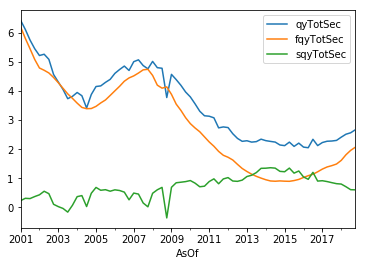

In [43]:
dn[['qyTotSec','fqyTotSec','sqyTotSec']].plot()

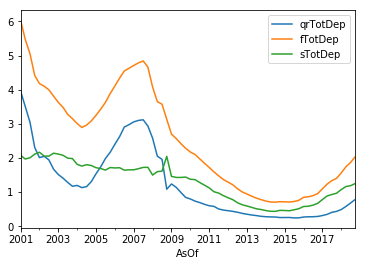

In [44]:
dn[['qrTotDep','fTotDep','sTotDep']].plot()

In [45]:
l1 = ['qyTotII','qyTotII','qrTotIE','qyTotLnLs','qyTotSec','qrTotDep']
l2 = ['qrTotIE','fTotII','fTotIE','fTotLnLs','fqyTotSec','fTotDep']
l3 = ['qyNIM','sTotII','sTotIE','sTotLnLs','sqyTotSec','sTotDep']
l1a = ['YldEA','Yld_EA','Rt_FS','Yld_LnLs','Yld_Sec','Rt_Dep']
l2a = ['CstFS','FTP_EA','FTP_FS','FTP_LnLs','FTP_Sec','FTP_Dep']
l3a = ['NIM','Spd_EA','Spd_FS','Spd_LnLs','Spd_Sec','Spd_Dep']
lt = ['Net Interest Margin','Earning Assets','Funding Sources','Loans & Leases','Total Securities','Total Deposits']
x = list(dn.index) # for x-axis values

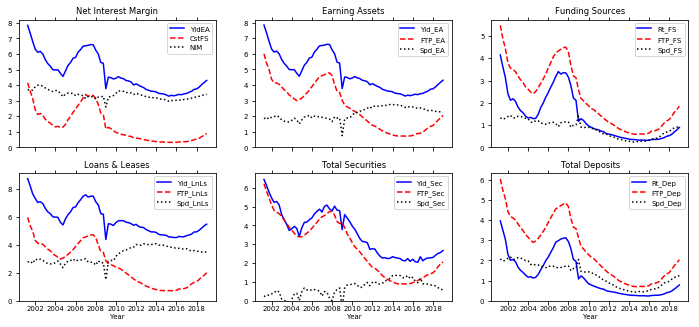

In [46]:
plt.rcParams.update({'font.size': 7})
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0]*2, plSize[1]*2) )  ## double width, single height

for i in np.arange(6):
  plt.subplot(3, 3, i+1)
  plt.plot(x,dn[l1[i]],c='b',ls='-',label=l1a[i])
  plt.plot(x,dn[l2[i]],c='r',ls='--',label=l2a[i])
  plt.plot(x,dn[l3[i]],c='k',ls=':',label=l3a[i])

  plt.ylim(bottom=0)
  plt.title(lt[i])
  plt.legend(loc=0,fontsize=7)

  if i < 3:
    labl = False
    plt.xlabel('',labelpad=2)
  else:
    labl = True
    plt.xlabel('Year',labelpad=2)
  plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    pad = 1.4,        # move labels closer to frame
    labelsize = 7,    # decrease font size of year labels
    labelbottom=labl) # labels along the bottom edge are off

plt.savefig('NIM_decomp_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

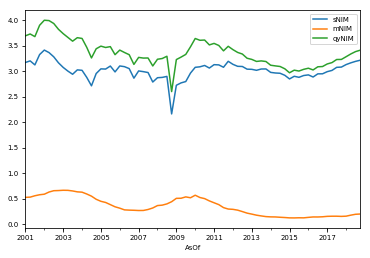

In [47]:
dn[['sNIM','mNIM','qyNIM']].plot()  # mismatch vs spread NIM

In [48]:
sp

['sqyRE',
 'sqyCI',
 'sqyCsmr',
 'sqyOthLnLs',
 'sqyTotSec',
 'sqyOAstIB',
 'sDDA',
 'sqrSavNow',
 'sqrCD',
 'sqrFDepIB',
 'sqrOLbIB']

In [49]:
rt = [x[1:] for x in sp]
rt

['qyRE',
 'qyCI',
 'qyCsmr',
 'qyOthLnLs',
 'qyTotSec',
 'qyOAstIB',
 'DDA',
 'qrSavNow',
 'qrCD',
 'qrFDepIB',
 'qrOLbIB']

In [50]:
# cNIM = calculatedNIM (use this for validation):
dn['cNIM'] = dn.apply(lambda x: (x[ba[0]]*x[rt[0]]+x[ba[1]]*x[rt[1]]+x[ba[2]]*x[rt[2]]+x[ba[3]]*x[rt[3]]+\
                     x[ba[4]]*x[rt[4]]+x[ba[5]]*x[rt[5]]-x[ba[6]]*x[rt[6]]-x[ba[7]]*x[rt[7]]-\
                     x[ba[8]]*x[rt[8]]-x[ba[9]]*x[rt[9]]-x[ba[10]]*x[rt[10]])/x['aEarnAst'],axis=1)

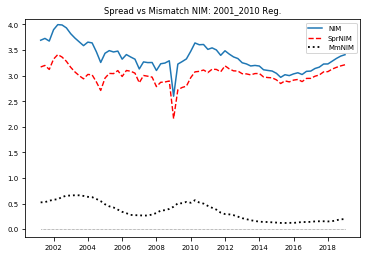

In [51]:
x = list(dn.index)
plt.plot(x,dn['qyNIM'],label='NIM')
plt.plot(x,dn['sNIM'],ls='--',lw=1.4,c='r',label='SprNIM')
plt.plot(x,dn['mNIM'],ls=':',lw=1.8,c='k',label='MmNIM')
plt.plot(x,dn['DDA'],ls=':',lw=.5,c='k',label='_no_legend')  ## omit legend entry!!!!
plt.title('Spread vs Mismatch NIM: '+r0 + ' Reg.')
plt.ylim([-.15,4.1])
plt.legend(loc=0)
plt.savefig('Spr_MmNIM_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

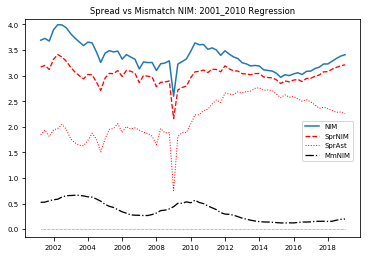

In [52]:
x = list(dn.index)
plt.plot(x,dn['qyNIM'],lw=1.5,label='NIM')
plt.plot(x,dn['sNIM'],ls='--',lw=1.3,c='r',label='SprNIM')
plt.plot(x,dn['sTotII'],ls=':',lw=1,c='r',label='SprAst')
plt.plot(x,dn['mNIM'],ls='-.',lw=1.3,c='k',label='MmNIM')
plt.plot(x,dn['DDA'],ls=':',lw=.5,c='k',label='_no_legend')  ## omit legend entry!!!!
plt.title('Spread vs Mismatch NIM: '+r0+' Regression')
plt.legend(bbox_to_anchor=(.99,.55))
plt.ylim([-.15,4.1])
plt.savefig('Spr_MmNIM2_'+grp+'_'+r0+'.png', dpi=400, bbox_inches='tight')
plt.show()

In [53]:
dn['2001':'2007'][['sNIM','mNIM','qyNIM','cNIM']].mean()

sNIM     3.058135
mNIM     0.478747
qyNIM    3.536883
cNIM     3.536883
dtype: float64

In [54]:
dnorig.to_csv('NIMdata_FDIC_'+grp+'_'+r0+'_sp_mmNIM.csv')
'NIMdata_FDIC_'+grp+'_'+r0+'_sp_mmNIM.csv'

'NIMdata_FDIC_grpTotUSx00_2001_2010_sp_mmNIM.csv'

In [55]:
dn.columns[0:75],dn.columns[75:]

(Index(['Grp', 'nbr', 'eTotAst', 'eTangEq', 'eDDA', 'qyNetII', 'qyTotII',
        'qyTotLn', 'qyRE', 'qyCI', 'qyCard', 'qyOthCsmr', 'qyOthLnLs', 'qyDFIB',
        'qyTreas', 'qyMBS', 'qyOthSec', 'qyFFS', 'qyOAstIB', 'qyTotLnLs',
        'qyTotSec', 'qrTotIE', 'qrNOW', 'qrSav', 'qrCDun', 'qrCDov', 'qrFFP',
        'qrBorr', 'qrOLbIB', 'qrDepIB', 'qrFDepIB', 'qyNIM', 'qyCsmr',
        'qrSavNow', 'qrCD', 'aTotAst', 'aDLn', 'aSFR', 'aRE', 'aTotRE', 'aAg',
        'aCI', 'aCard', 'aOthCsmr', 'aFLn', 'aLeas', 'aTrad', 'aDFIB', 'aTreas',
        'aMBS', 'aOSec', 'aFFS', 'aTotLn', 'aTotLnLs', 'aOthLnLs', 'aTotSec',
        'aOAstIB', 'aEarnAst', 'aNOW', 'aSav', 'aCDun', 'aCDov', 'aDDepIB',
        'aFDepIB', 'aFFP', 'aBorr', 'aDepIB', 'aOLbIB', 'aFF_TA', 'aCsmr',
        'aSavNow', 'aCD', 'rNIM', 'aLnLsPc', 'aAstPc'],
       dtype='object'),
 Index(['aLiabPc', 'netDDA', 'fDDA', 'fPrime', 'fqrCD', 'fqrFDepIB', 'fqrOLbIB',
        'fqrSavNow', 'fqyCI', 'fqyCsmr', 'fqyOAstIB', 'fqyOthLnLs', 'fqy